importing Jupyter notebook from ImageDenoise.ipynb


Estimated Gaussian noise standard deviation = 0.0019855610727312237


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


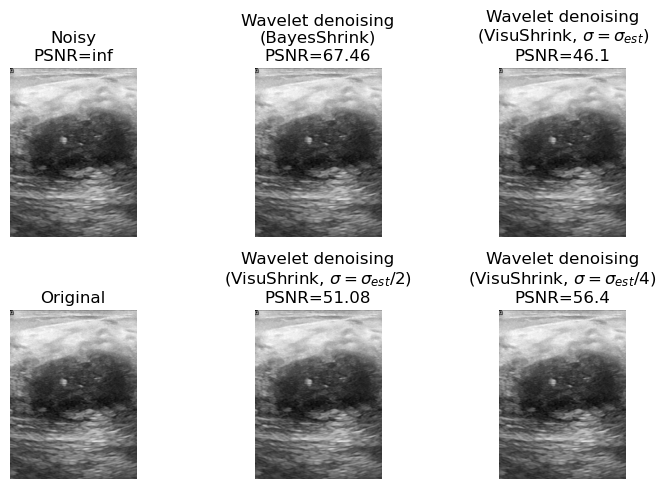

QObject::moveToThread: Current thread (0x5635fc0) is not the object's thread (0x761c800).
Cannot move to target thread (0x5635fc0)

QObject::moveToThread: Current thread (0x5635fc0) is not the object's thread (0x761c800).
Cannot move to target thread (0x5635fc0)

QObject::moveToThread: Current thread (0x5635fc0) is not the object's thread (0x761c800).
Cannot move to target thread (0x5635fc0)

QObject::moveToThread: Current thread (0x5635fc0) is not the object's thread (0x761c800).
Cannot move to target thread (0x5635fc0)

QObject::moveToThread: Current thread (0x5635fc0) is not the object's thread (0x761c800).
Cannot move to target thread (0x5635fc0)

QObject::moveToThread: Current thread (0x5635fc0) is not the object's thread (0x761c800).
Cannot move to target thread (0x5635fc0)

QObject::moveToThread: Current thread (0x5635fc0) is not the object's thread (0x761c800).
Cannot move to target thread (0x5635fc0)

QObject::moveToThread: Current thread (0x5635fc0) is not the object's thread

In [14]:
import matplotlib.pyplot as plt

from skimage.restoration import (denoise_wavelet, estimate_sigma)
from skimage import data, img_as_float,io
from skimage.metrics import peak_signal_noise_ratio
from fcmeans import FCM as f
import numpy as np
import pywt
import cv2 as cv


noisy = img_as_float(io.imread("/home/boss/Documents/Dataset_BUSI_with_GT/malignant/malignant (1).png"))
img_mask = img_as_float(io.imread("/home/boss/Documents/Dataset_BUSI_with_GT/malignant/malignant (1)_mask.png",0))
sigma = 0.12

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(8, 5),
                       sharex=True, sharey=True)

plt.gray()

# Estimate the average noise standard deviation across color channels.
sigma_est = estimate_sigma(noisy, channel_axis=-1, average_sigmas=True)
# Due to clipping in random_noise, the estimate will be a bit smaller than the
# specified sigma.
print(f'Estimated Gaussian noise standard deviation = {sigma_est}')

im_bayes = denoise_wavelet(noisy,wavelet='db2',channel_axis=-1, convert2ycbcr=True,
                           method='BayesShrink', mode='soft',
                           rescale_sigma=True)
im_visushrink = denoise_wavelet(noisy,wavelet='db2',channel_axis=-1, convert2ycbcr=True,
                                method='VisuShrink', mode='soft',
                                sigma=sigma_est, rescale_sigma=True)

# VisuShrink is designed to eliminate noise with high probability, but this
# results in a visually over-smooth appearance.  Repeat, specifying a reduction
# in the threshold by factors of 2 and 4.
im_visushrink2 = denoise_wavelet(noisy,wavelet='db2' ,channel_axis=-1, convert2ycbcr=True,
                                 method='VisuShrink', mode='soft',
                                 sigma=sigma_est/2, rescale_sigma=True)

im_visushrink4 = denoise_wavelet(noisy,wavelet='db2',channel_axis=-1, convert2ycbcr=True,
                                 method='VisuShrink', mode='soft',
                                 sigma=sigma_est/4, rescale_sigma=True)

# Compute PSNR as an indication of image quality
psnr_noisy = peak_signal_noise_ratio(noisy, noisy)
psnr_bayes = peak_signal_noise_ratio(noisy, im_bayes)
psnr_visushrink = peak_signal_noise_ratio(noisy, im_visushrink)
psnr_visushrink2 = peak_signal_noise_ratio(noisy, im_visushrink2)
psnr_visushrink4 = peak_signal_noise_ratio(noisy, im_visushrink4)

ax[0, 0].imshow(noisy)
ax[0, 0].axis('off')
ax[0, 0].set_title(f'Noisy\nPSNR={psnr_noisy:0.4g}')
ax[0, 1].imshow(im_bayes)
ax[0, 1].axis('off')
ax[0, 1].set_title(
    f'Wavelet denoising\n(BayesShrink)\nPSNR={psnr_bayes:0.4g}')
ax[0, 2].imshow(im_visushrink)
ax[0, 2].axis('off')
ax[0, 2].set_title(
    'Wavelet denoising\n(VisuShrink, $\\sigma=\\sigma_{est}$)\n'
     'PSNR=%0.4g' % psnr_visushrink)
ax[1, 0].imshow(noisy)
ax[1, 0].axis('off')
ax[1, 0].set_title('Original')
ax[1, 1].imshow(im_visushrink2)
ax[1, 1].axis('off')
ax[1, 1].set_title(
    'Wavelet denoising\n(VisuShrink, $\\sigma=\\sigma_{est}/2$)\n'
     'PSNR=%0.4g' % psnr_visushrink2)
ax[1, 2].imshow(im_visushrink4)
ax[1, 2].axis('off')
ax[1, 2].set_title(
    'Wavelet denoising\n(VisuShrink, $\\sigma=\\sigma_{est}/4$)\n'
     'PSNR=%0.4g' % psnr_visushrink4)
fig.tight_layout()

plt.show()




# # # cv.imshow('Filtered', LL)
cv.imshow("original",noisy)
cv.imshow("bayes",im_bayes)
# cv.imshow("mask",img_mask)
# cv.imshow("kCM",img1)
# cv.imshow("FCM",img2)
cv.imshow("visualShrink",im_visushrink)
cv.imshow("visualShrink1",im_visushrink2)
cv.imshow("visualshrink2",im_visushrink4)
cv.waitKey(0)
cv.destroyAllWindows()





[[[0.00392157 0.00392157 0.00392157 0.00392157]
  [0.03529412 0.03529412 0.03529412 0.03529412]
  [0.01176471 0.01176471 0.01176471 0.01176471]
  ...
  [0.         0.         0.         0.        ]
  [0.         0.         0.         0.        ]
  [0.01568627 0.01568627 0.01568627 0.01568627]]

 [[0.00784314 0.00784314 0.00784314 0.00784314]
  [0.         0.         0.         0.        ]
  [0.50980395 0.50980395 0.50980395 0.50980395]
  ...
  [0.         0.         0.         0.        ]
  [0.09019608 0.09019608 0.09019608 0.09019608]
  [0.         0.         0.         0.        ]]

 [[0.         0.         0.         0.        ]
  [0.04313725 0.04313725 0.04313725 0.04313725]
  [0.48627448 0.48627448 0.48627448 0.48627448]
  ...
  [0.         0.         0.         0.        ]
  [0.         0.         0.         0.        ]
  [0.01960784 0.01960784 0.01960784 0.01960784]]

 ...

 [[0.23921569 0.23921569 0.23921569 0.23921569]
  [0.23921569 0.23921569 0.23921569 0.23921569]
  [0.24313

IndexError: list index out of range

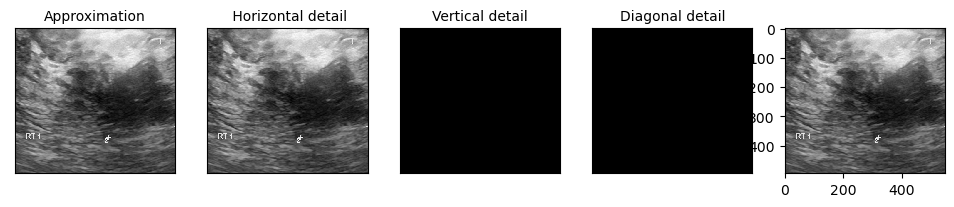

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import pywt
import pywt.data


# Load image
original =  cv.imread("/home/boss/Documents/Dataset_BUSI_with_GT/malignant/malignant (2).png")
# original = cv.imread("/home/boss/Pictures/attachments (2)/IMG_1633.JPG")

original=np.array(original,dtype=np.float32)
original=original/255

# Wavelet transform of image, and plot approximation and details
titles = ['Approximation', ' Horizontal detail',
          'Vertical detail', 'Diagonal detail']
coeffs = pywt.wavedec(original, 'db1')
print(pywt.waverec(coeffs, 'db1'))
print(len(coeffs))
# coeffs2 = pywt.dwt2(original, 'bior1.3')
LL, LH= coeffs
LL1=LL[:,:,0]
LL2=LL[:,:,1]
LH1=LH[:,:,0]
LH2=LH[:,:,1]

fig = plt.figure(figsize=(12, 3))
for i, a in enumerate([LL1,LL2, LH1,LH2,original]):
    ax = fig.add_subplot(1, 5, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])

fig.tight_layout()
plt.show()
Z = LL.reshape((-1,3))

plt.imshow(LH[:,:,0])

my_model = f(n_clusters=2,m=6.5,max_iter=100,random_state=42) 
# z=np.uint8(my_model)
Z = np.float32(Z)
my_model.fit(Z)
center = my_model.centers
label = my_model.predict(Z)
center = np.uint8(center)
Fres = center[label.flatten()]
Fres2 = Fres.reshape((LL.shape))


# cv.imshow('Filtered', LL)
# # cv.imshow('Filtered',Fres2)
# cv.waitKey(0)
# cv.destroyAllWindows()


1


TypeError: Invalid shape (1, 495, 548, 3) for image data

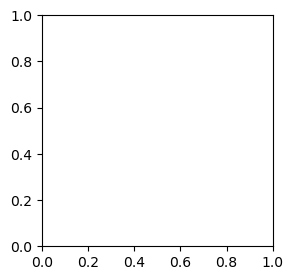

In [97]:
import numpy as np
import matplotlib.pyplot as plt

import pywt
import pywt.data


# Load image
original =  cv.imread("/home/boss/Documents/Dataset_BUSI_with_GT/malignant/malignant (2).png",1)
original=original/255

# Wavelet transform of image, and plot approximation and details
titles = ['Approximation', ' Horizontal detail',
          'Vertical detail', 'Diagonal detail']
coeffs2 = pywt.wavedec(original, 'bior1.3')
print(len(coeffs2))
# LL, (LH, HL, HH)= coeffs2
LL=coeffs2
fig = plt.figure(figsize=(12, 3))
for i, a in enumerate([LL]):
    ax = fig.add_subplot(1, 1, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])

fig.tight_layout()
plt.show()





In [51]:
help(pywt.dwt2)

Help on function dwt2 in module pywt._multidim:

dwt2(data, wavelet, mode='symmetric', axes=(-2, -1))
    2D Discrete Wavelet Transform.
    
    Parameters
    ----------
    data : array_like
        2D array with input data
    wavelet : Wavelet object or name string, or 2-tuple of wavelets
        Wavelet to use.  This can also be a tuple containing a wavelet to
        apply along each axis in ``axes``.
    mode : str or 2-tuple of strings, optional
        Signal extension mode, see :ref:`Modes <ref-modes>`. This can
        also be a tuple of modes specifying the mode to use on each axis in
        ``axes``.
    axes : 2-tuple of ints, optional
        Axes over which to compute the DWT. Repeated elements mean the DWT will
        be performed multiple times along these axes.
    
    Returns
    -------
    (cA, (cH, cV, cD)) : tuple
        Approximation, horizontal detail, vertical detail and diagonal
        detail coefficients respectively.  Horizontal refers to array axis 

In [2]:
import cv2 as cv

img = cv.imread("/home/boss/Documents/Dataset_BUSI_with_GT/malignant/malignant (1).png")

blur = cv.bilateralFilter(img,9,75,75)

nimg = cv.ximgproc.anisotropicDiffusion(blur, alpha=0.1, K=0.02, niters=10)




# # Display the filtered image
cv.imshow('original',img)
cv.imshow("bilateral",blur)
cv.imshow('Filtered', nimg)
cv.waitKey(0)
cv.destroyAllWindows()




QObject::moveToThread: Current thread (0xe52e90) is not the object's thread (0x124b9e0).
Cannot move to target thread (0xe52e90)

QObject::moveToThread: Current thread (0xe52e90) is not the object's thread (0x124b9e0).
Cannot move to target thread (0xe52e90)

QObject::moveToThread: Current thread (0xe52e90) is not the object's thread (0x124b9e0).
Cannot move to target thread (0xe52e90)

QObject::moveToThread: Current thread (0xe52e90) is not the object's thread (0x124b9e0).
Cannot move to target thread (0xe52e90)

QObject::moveToThread: Current thread (0xe52e90) is not the object's thread (0x124b9e0).
Cannot move to target thread (0xe52e90)

QObject::moveToThread: Current thread (0xe52e90) is not the object's thread (0x124b9e0).
Cannot move to target thread (0xe52e90)

QObject::moveToThread: Current thread (0xe52e90) is not the object's thread (0x124b9e0).
Cannot move to target thread (0xe52e90)

QObject::moveToThread: Current thread (0xe52e90) is not the object's thread (0x124b9e0).
C

In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
from fcmeans import FCM as f
import import_ipynb
import ImageDenoise as ID
from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float
from skimage import io
import argparse





importing Jupyter notebook from ImageDenoise.ipynb


In [3]:
imag= cv.imread("/home/boss/Documents/Dataset_BUSI_with_GT/malignant/malignant (1).png")
img=ID.waveletDenoise(imag)
for i in range(5):
    global img
    img=ID.waveletDenoise(img[3])

cv.imshow('img',imag)  
cv.imshow('filter',img[3])
cv.waitKey(0)
cv.destroyAllWindows()

Estimated Gaussian noise standard deviation = 0.0019855610727312237
Estimated Gaussian noise standard deviation = 0.0019855610727312237
Estimated Gaussian noise standard deviation = 0.0019855610727312237
Estimated Gaussian noise standard deviation = 0.0019855610727312237
Estimated Gaussian noise standard deviation = 0.0019855610727312237
Estimated Gaussian noise standard deviation = 0.0019855610727312237


QObject::moveToThread: Current thread (0x6c271d0) is not the object's thread (0x6ef7c20).
Cannot move to target thread (0x6c271d0)

QObject::moveToThread: Current thread (0x6c271d0) is not the object's thread (0x6ef7c20).
Cannot move to target thread (0x6c271d0)

QObject::moveToThread: Current thread (0x6c271d0) is not the object's thread (0x6ef7c20).
Cannot move to target thread (0x6c271d0)

QObject::moveToThread: Current thread (0x6c271d0) is not the object's thread (0x6ef7c20).
Cannot move to target thread (0x6c271d0)

QObject::moveToThread: Current thread (0x6c271d0) is not the object's thread (0x6ef7c20).
Cannot move to target thread (0x6c271d0)

QObject::moveToThread: Current thread (0x6c271d0) is not the object's thread (0x6ef7c20).
Cannot move to target thread (0x6c271d0)

QObject::moveToThread: Current thread (0x6c271d0) is not the object's thread (0x6ef7c20).
Cannot move to target thread (0x6c271d0)

QObject::moveToThread: Current thread (0x6c271d0) is not the object's thread

QObject::moveToThread: Current thread (0x6c271d0) is not the object's thread (0x6ef7c20).
Cannot move to target thread (0x6c271d0)

QObject::moveToThread: Current thread (0x6c271d0) is not the object's thread (0x6ef7c20).
Cannot move to target thread (0x6c271d0)

QObject::moveToThread: Current thread (0x6c271d0) is not the object's thread (0x6ef7c20).
Cannot move to target thread (0x6c271d0)

QObject::moveToThread: Current thread (0x6c271d0) is not the object's thread (0x6ef7c20).
Cannot move to target thread (0x6c271d0)

QObject::moveToThread: Current thread (0x6c271d0) is not the object's thread (0x6ef7c20).
Cannot move to target thread (0x6c271d0)

QObject::moveToThread: Current thread (0x6c271d0) is not the object's thread (0x6ef7c20).
Cannot move to target thread (0x6c271d0)

QObject::moveToThread: Current thread (0x6c271d0) is not the object's thread (0x6ef7c20).
Cannot move to target thread (0x6c271d0)

QObject::moveToThread: Current thread (0x6c271d0) is not the object's thread

Estimated Gaussian noise standard deviation = 0.0019855610727311894


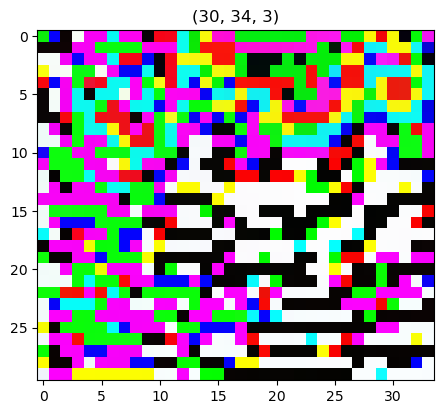

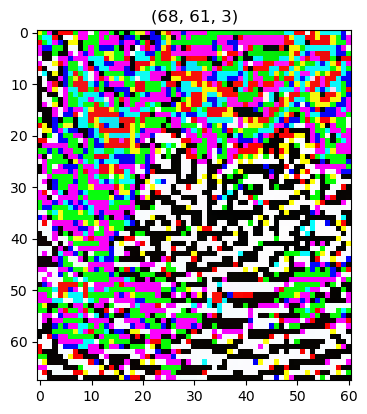

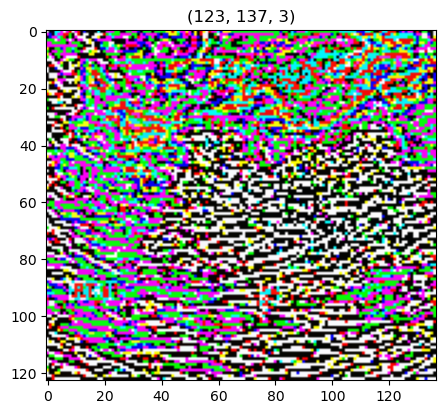

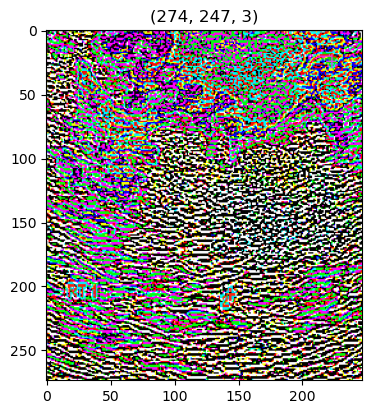

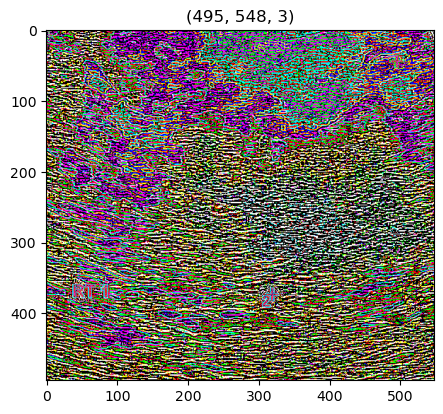

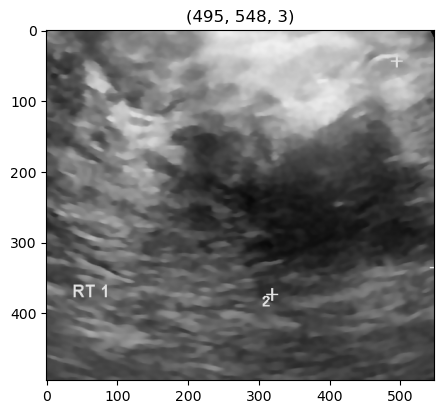

6


QObject::moveToThread: Current thread (0x68160f0) is not the object's thread (0x7dae6e0).
Cannot move to target thread (0x68160f0)

QObject::moveToThread: Current thread (0x68160f0) is not the object's thread (0x7dae6e0).
Cannot move to target thread (0x68160f0)

QObject::moveToThread: Current thread (0x68160f0) is not the object's thread (0x7dae6e0).
Cannot move to target thread (0x68160f0)

QObject::moveToThread: Current thread (0x68160f0) is not the object's thread (0x7dae6e0).
Cannot move to target thread (0x68160f0)

QObject::moveToThread: Current thread (0x68160f0) is not the object's thread (0x7dae6e0).
Cannot move to target thread (0x68160f0)

QObject::moveToThread: Current thread (0x68160f0) is not the object's thread (0x7dae6e0).
Cannot move to target thread (0x68160f0)

QObject::moveToThread: Current thread (0x68160f0) is not the object's thread (0x7dae6e0).
Cannot move to target thread (0x68160f0)

QObject::moveToThread: Current thread (0x68160f0) is not the object's thread

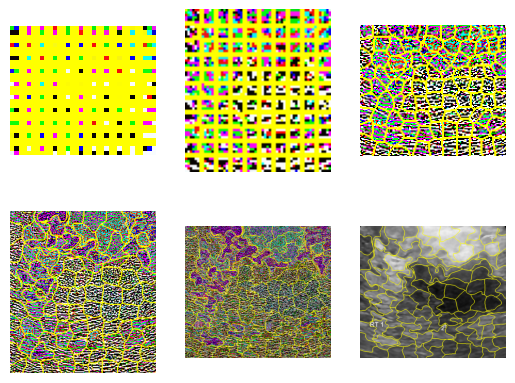

In [4]:

# img = cv.imread("/home/boss/Pictures/attachments (2)/IMG_1633.JPG")
img = cv.imread("/home/boss/Documents/Dataset_BUSI_with_GT/malignant/malignant (2).png")

imgL=ID.waveletDenoise(img)
imgdenCON=ID.CLAHEcontrastEnhance(np.array(imgL[3]*255,dtype=np.uint8))
# imgdenCON=ID.CLAHEcontrastEnhance(imgL)
# imgdenCON=ID.HistContrastEnhance(np.array(imgL[3]*255,dtype=np.uint8))

scaledimg=GaussianDownSampling(imgdenCON)
scaledimg.append(img)


for i in range(len(scaledimg)):
    plt.figure(figsize=(20,10))
    plt.subplot(2,3,i+1)
    
    blur = cv.bilateralFilter(scaledimg[i],9,75,75)
    scaledimg[i] = cv.ximgproc.anisotropicDiffusion(blur, alpha=0.1, K=0.02, niters=10)

    plt.imshow(scaledimg[i])
    plt.title(scaledimg[i].shape)
    
    plt.show()

    
# val=cv.ximgproc.createSuperpixelSLIC(scaledimg[4],algorithm =100,region_size = 10,ruler = 10.0)

segments=[]

for i in range(len(scaledimg)):
    
    image = img_as_float(scaledimg[i])


    segments.append(slic(image, n_segments = 100, sigma = 5,compactness=10))

    # show the output of SLIC
    fig = plt.figure("Superpixels -- %d segments%")
    plt.subplot(2, 3, i+1)
    plt.imshow(mark_boundaries(image, segments[i]))
    plt.axis("off")

#     # show the plots

  
print(len(segments))
cv.imshow("original",scaledimg[3])
cv.imshow("org",scaledimg[4])
# cv.imshow('Filtered', imgL[3])



cv.waitKey(0)
cv.destroyAllWindows()


In [6]:
# Apply the Component analysis function
print(segments[4].shape)
(th,img)=ID.Otsu_threshold(segments[4])
analysis = cv2.connectedComponentsWithStats(img,4,cv2.CV_32S)
(totalLabels, label_ids, values, centroid) = analysis

# Initialize a new image to
# store all the output components
output = np.zeros(gray_img.shape, dtype="uint8")


(495, 548)


error: OpenCV(4.7.0) /io/opencv/modules/imgproc/src/color.simd_helpers.hpp:92: error: (-2:Unspecified error) in function 'cv::impl::{anonymous}::CvtHelper<VScn, VDcn, VDepth, sizePolicy>::CvtHelper(cv::InputArray, cv::OutputArray, int) [with VScn = cv::impl::{anonymous}::Set<3, 4>; VDcn = cv::impl::{anonymous}::Set<1>; VDepth = cv::impl::{anonymous}::Set<0, 2, 5>; cv::impl::{anonymous}::SizePolicy sizePolicy = cv::impl::<unnamed>::NONE; cv::InputArray = const cv::_InputArray&; cv::OutputArray = const cv::_OutputArray&]'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 1


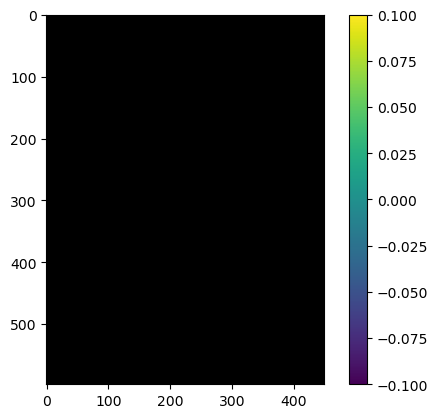

(<matplotlib.image.AxesImage at 0x7f4bca1e4bb0>,
 None)

In [10]:
img=cv.imread("/home/boss/Documents/Dataset_BUSI_with_GT/malignant/malignant (1).png")

assert img is not None, "file could not be read, check with os.path.exists()"
mask = np.zeros(img.shape[:2],np.uint8)
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)
rect = (50,50,450,290)
cv.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv.GC_INIT_WITH_RECT)


In [32]:
import cv2
from skimage.segmentation import slic

# Load the image using OpenCV
image = cv2.imread("/home/boss/Documents/Dataset_BUSI_with_GT/malignant/malignant (28).png")

# Convert the image from BGR to RGB format
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Perform SLIC superpixel segmentation
num_segments = 150  # Number of desired superpixels
segments = slic(image_rgb, n_segments=num_segments, compactness=10)

# Visualize the superpixel segmentation
output = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2BGR)
for label in np.unique(segments):
    mask = segments == label
    output[mask] = np.random.randint(0, 255, 3)

# Display the output image
cv2.imshow('Superpixel Segmentation', output)
cv2.waitKey(0)
cv2.destroyAllWindows()


QObject::moveToThread: Current thread (0x62bcab0) is not the object's thread (0x6e19c30).
Cannot move to target thread (0x62bcab0)

QObject::moveToThread: Current thread (0x62bcab0) is not the object's thread (0x6e19c30).
Cannot move to target thread (0x62bcab0)

QObject::moveToThread: Current thread (0x62bcab0) is not the object's thread (0x6e19c30).
Cannot move to target thread (0x62bcab0)

QObject::moveToThread: Current thread (0x62bcab0) is not the object's thread (0x6e19c30).
Cannot move to target thread (0x62bcab0)

QObject::moveToThread: Current thread (0x62bcab0) is not the object's thread (0x6e19c30).
Cannot move to target thread (0x62bcab0)

QObject::moveToThread: Current thread (0x62bcab0) is not the object's thread (0x6e19c30).
Cannot move to target thread (0x62bcab0)

QObject::moveToThread: Current thread (0x62bcab0) is not the object's thread (0x6e19c30).
Cannot move to target thread (0x62bcab0)

QObject::moveToThread: Current thread (0x62bcab0) is not the object's thread

In [2]:
import math as mt
def GaussianDownSampling(img):
    i=0
    imgscale=[img]
    while(i<=4):
        
        imgb=cv.GaussianBlur(imgscale[i],(3,3),0)

        a=imgb
        shape=(mt.floor(imgscale[i].shape[0]/2),mt.floor(imgscale[i].shape[1]/2))

        imgscale.append(cv.resize(a,shape,interpolation=cv.INTER_CUBIC))

        i=i+1

    val=GaussianUpSampling(imgscale)
    
    return val



In [3]:
def GaussianUpSampling(img):
    laplacian=[]
    for i in range(len(img)-1,0,-1):

        imag=cv.resize(img[i],(img[i-1].shape[1],img[i-1].shape[0]),interpolation=cv.INTER_CUBIC)
        laplacian.append(img[i-1]-imag)
        
    return laplacian
    
    

In [8]:
import cv2 as cv
import math as mt


img = cv.imread("/home/boss/Documents/Dataset_BUSI_with_GT/malignant/malignant (1).png")

lower_reso = cv.pyrDown(img)
higher_reso2 = cv.pyrUp(lower_reso)
cv.imshow('original',img)
cv.imshow('Filtered',lower_reso)
cv.imshow('up',higher_reso2)
cv.waitKey(0)
cv.destroyAllWindows()

QObject::moveToThread: Current thread (0x6b03f00) is not the object's thread (0x6db19a0).
Cannot move to target thread (0x6b03f00)

QObject::moveToThread: Current thread (0x6b03f00) is not the object's thread (0x6db19a0).
Cannot move to target thread (0x6b03f00)

QObject::moveToThread: Current thread (0x6b03f00) is not the object's thread (0x6db19a0).
Cannot move to target thread (0x6b03f00)

QObject::moveToThread: Current thread (0x6b03f00) is not the object's thread (0x6db19a0).
Cannot move to target thread (0x6b03f00)

QObject::moveToThread: Current thread (0x6b03f00) is not the object's thread (0x6db19a0).
Cannot move to target thread (0x6b03f00)

QObject::moveToThread: Current thread (0x6b03f00) is not the object's thread (0x6db19a0).
Cannot move to target thread (0x6b03f00)

QObject::moveToThread: Current thread (0x6b03f00) is not the object's thread (0x6db19a0).
Cannot move to target thread (0x6b03f00)

QObject::moveToThread: Current thread (0x6b03f00) is not the object's thread

In [1]:
import cv2
import numpy as np
img = cv2.imread("/home/boss/Pictures/attachments (2)/IMG_1633.JPG")
# img = cv.imread("/home/boss/Documents/Dataset_BUSI_with_GT/malignant/malignant (1).png")
layer = img.copy()
gaussian_pyramid_list = [layer]

for i in range(6):
    layer = cv2.pyrDown(layer)
    gaussian_pyramid_list.append(layer)
    #cv2.imshow(str(i), layer)

layer = gaussian_pyramid_list[5]
cv2.imshow('upper level Gaussian Pyramid', layer)
laplacian_pyramid_list = [layer]

for i in range(5, 0, -1):
    gaussian_extended = cv2.pyrUp(gaussian_pyramid_list[i])
    laplacian = cv2.subtract(gaussian_pyramid_list[i-1], gaussian_extended)
    cv2.imshow(str(i), laplacian)

cv2.imshow("Original image", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

QObject::moveToThread: Current thread (0x1815180) is not the object's thread (0x17463d0).
Cannot move to target thread (0x1815180)

QObject::moveToThread: Current thread (0x1815180) is not the object's thread (0x17463d0).
Cannot move to target thread (0x1815180)

QObject::moveToThread: Current thread (0x1815180) is not the object's thread (0x17463d0).
Cannot move to target thread (0x1815180)

QObject::moveToThread: Current thread (0x1815180) is not the object's thread (0x17463d0).
Cannot move to target thread (0x1815180)

QObject::moveToThread: Current thread (0x1815180) is not the object's thread (0x17463d0).
Cannot move to target thread (0x1815180)

QObject::moveToThread: Current thread (0x1815180) is not the object's thread (0x17463d0).
Cannot move to target thread (0x1815180)

QObject::moveToThread: Current thread (0x1815180) is not the object's thread (0x17463d0).
Cannot move to target thread (0x1815180)

QObject::moveToThread: Current thread (0x1815180) is not the object's thread

In [2]:
import cv2
import numpy as np
img = cv2.imread("/home/boss/Pictures/attachments (2)/IMG_2567.JPG")
imag=cv2.resize(img,(500,500),interpolation=cv2.)
layer = imag.copy()
gaussian_pyramid_list = [layer]

for i in range(6):
    layer = cv2.pyrDown(layer)
    gaussian_pyramid_list.append(layer)
    #cv2.imshow(str(i), layer)

layer = gaussian_pyramid_list[5]
cv2.imshow('upper level Gaussian Pyramid', layer)
laplacian_pyramid_list = [layer]

for i in range(5, 0, -1):
    gaussian_extended = cv2.pyrUp(gaussian_pyramid_list[i])
    laplacian = cv2.subtract(gaussian_pyramid_list[i-1], gaussian_extended)
    cv2.imshow(str(i), laplacian)

cv2.imshow("Original image", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

QObject::moveToThread: Current thread (0x1815180) is not the object's thread (0x17463d0).
Cannot move to target thread (0x1815180)

QObject::moveToThread: Current thread (0x1815180) is not the object's thread (0x17463d0).
Cannot move to target thread (0x1815180)

QObject::moveToThread: Current thread (0x1815180) is not the object's thread (0x17463d0).
Cannot move to target thread (0x1815180)

QObject::moveToThread: Current thread (0x1815180) is not the object's thread (0x17463d0).
Cannot move to target thread (0x1815180)

QObject::moveToThread: Current thread (0x1815180) is not the object's thread (0x17463d0).
Cannot move to target thread (0x1815180)

QObject::moveToThread: Current thread (0x1815180) is not the object's thread (0x17463d0).
Cannot move to target thread (0x1815180)

QObject::moveToThread: Current thread (0x1815180) is not the object's thread (0x17463d0).
Cannot move to target thread (0x1815180)

QObject::moveToThread: Current thread (0x1815180) is not the object's thread

error: OpenCV(4.7.0) /io/opencv/modules/core/src/arithm.cpp:647: error: (-209:Sizes of input arguments do not match) The operation is neither 'array op array' (where arrays have the same size and the same number of channels), nor 'array op scalar', nor 'scalar op array' in function 'arithm_op'


In [13]:
import cv2
import numpy as np
img = cv2.imread("/home/boss/Documents/Dataset_BUSI_with_GT/malignant/malignant (1).png")
print(img.shape)

if(img.shape[0]%2!=0):
    new_img=cv2.resize(img,(img.shape[1],img.shape[0]+1),interpolation=cv2.INTER_NEAREST)
elif(img.shape[1]%2!=0):
    new_img=cv2.resize(img,(img.shape[1]+1,img.shape[0]),interpolation=cv2.INTER_CUBIC)
else:
    pass
print(new_img.shape)



(598, 449, 3)
(598, 450, 3)


In [3]:
import cv2
import numpy as np
img = cv2.imread("/home/boss/Pictures/attachments (2)/IMG_20200308_104219.jpg")
img.shape

(955, 561, 3)